# Info: Control Notebook-1
- Author: Manash Chakraborty.
- Update: 20 June, 2025

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import control as ct


In [6]:
# Functions
def plot_graph(x, y, title=None, xlabel=None, ylabel=None, legend=False, filename=None):
    plt.figure()
    if legend:
        plt.plot(x, y, label='Response')
        plt.legend()
    else:
        plt.plot(x, y)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.grid(True)
    if filename:
        plt.savefig(filename)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True)
    plt.show()

Let's say the transfer function is:
$$
tf = \frac{1}{s^2 + 2s + 4}
$$

In [8]:
# Define Transfer Function
num = [1]
den = [1, 2, 4]
tf = ct.tf(num, den)
print("Transfer Function:")
tf

Transfer Function:


TransferFunction(array([1]), array([1, 2, 4]))

#### Compute Step Response:
- First define a time vector and then call `ct.step_response`.

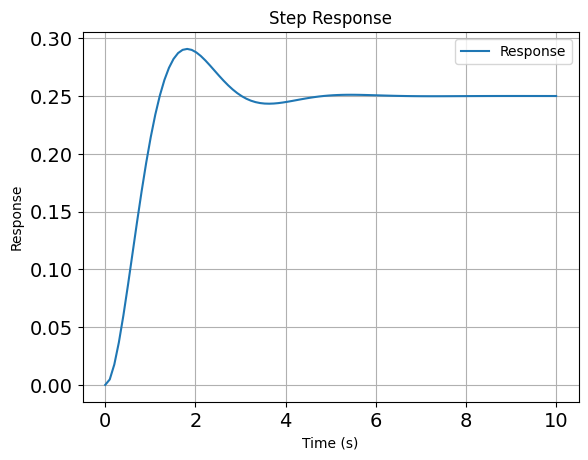

In [9]:
# Step Response:
time_vector = np.linspace(0, 10, 100)
time, response = ct.step_response(tf, T=time_vector)
plot_graph(time, response, title='Step Response', xlabel='Time (s)', ylabel='Response', legend=True)

Let's create a sinusoidal input: (with an offset)

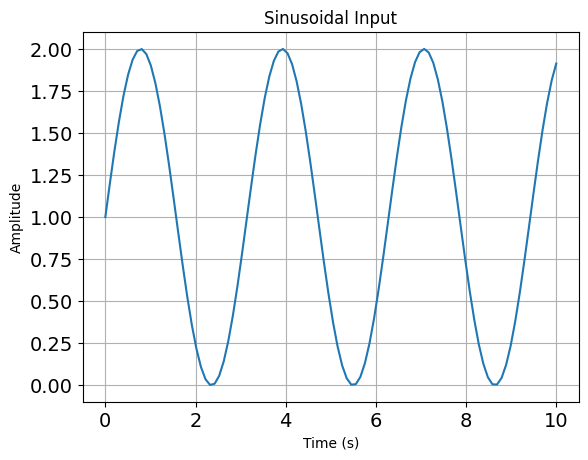

In [13]:
# Create sinusoidal input
t = np.linspace(0, 10, 100)
#sinusoidal_input = np.sin(t)  # Simple sinusoidal input
sinusoidal_input = np.sin(2*t) + np.ones(t.shape)  # Sinusoidal input with offset
plot_graph(t, sinusoidal_input, title='Sinusoidal Input', xlabel='Time (s)', ylabel='Amplitude')

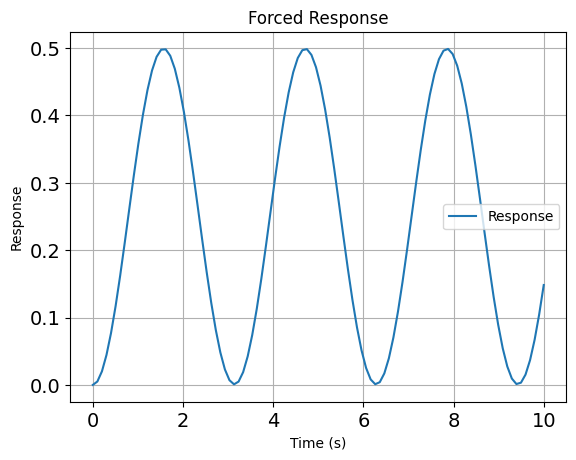

In [14]:
# Forced Response:
forced_response_time, forced_response = ct.forced_response(tf, T=t, U=sinusoidal_input)
plot_graph(forced_response_time, forced_response, title='Forced Response', xlabel='Time (s)', ylabel='Response', legend=True)

**Note:**
- Let's look at our transfer function:
$$
tf = \frac{1}{s^2 + 2s + 4}.
$$
- _We find gain by putting $s=0$. So gain of `tf` is $\frac{1}{0^2 + 2*0 + 4} = \frac{1}{4}$._
- So the response of the system will be multiplied with this gain. Here, that means the output response will be $4$ times attenuated.
- Infact from the plot above, we can see after the initial transient response died out, the output follows axpproximately same response, except the amplitude is $4$ time smaller.

Now let's simulate the system response to a non-zero input:
- see initial state response

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/timeresp.py:1089: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


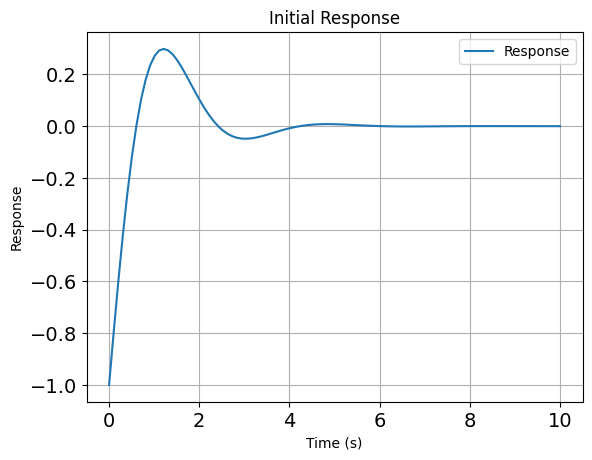

In [15]:
# Simulate the system with arbitrary input
t = np.linspace(0, 10, 100)
init_state = np.array([2, -1])  # Arbitary Non-Zero Initial state for the system
init_response_time, init_response = ct.initial_response(tf, T=t, X0=init_state)
plot_graph(init_response_time, init_response, title='Initial Response', xlabel='Time (s)', ylabel='Response', legend=True)

**Note:**
- We gave the system a non-zero init state, but still after some settling time, the system settled down to 0.
- This means system is stable.